# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

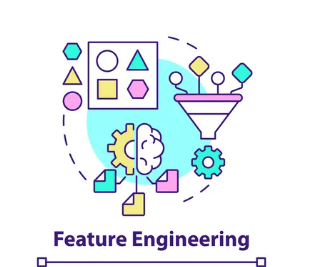

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [4]:

import pandas as pd
ndf = pd.read_csv('loan_train.csv')
ndf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:

ndf = df.select_dtypes(include = 'number')
ndf

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [21]:

from sklearn.impute import SimpleImputer
ndf = df.select_dtypes(include = 'number')
impute = SimpleImputer(strategy='mean')
df = impute.fit_transform(ndf)
df = pd.DataFrame(data = df, columns = ndf.columns)
df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

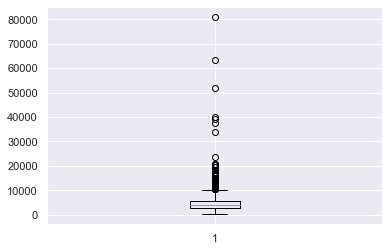

In [45]:
# using inter quartile range

import matplotlib.pyplot as plt 
plt.boxplot(ndf['ApplicantIncome'])
plt.show()

In [49]:
Q1 = ndf['ApplicantIncome'].quantile(0.25)
Q3 = ndf['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + (IQR*1.5)
lower_limit = Q1 - (IQR*1.5)
ndf1 = ndf[(ndf.ApplicantIncome > lower_limit) & (ndf.ApplicantIncome < upper_limit)]
ndf1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


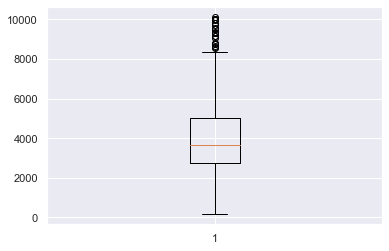

In [50]:
plt.boxplot(ndf1['ApplicantIncome'])
plt.show()

In [51]:
# using Standard Deviation

std = df.ApplicantIncome.std()
mean = df.ApplicantIncome.mean()
upper_limit = mean + (3 * std)
lower_limit = mean - (3 * std)
ndf1 = ndf1[(ndf1.ApplicantIncome > lower_limit) & (ndf1.ApplicantIncome < upper_limit)]
ndf1.shape

(564, 5)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

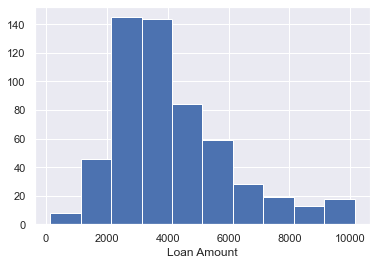

In [71]:
# Write your solution here

plt.hist(ndf1.ApplicantIncome)
plt.xlabel('Applicant Income')
plt.show()


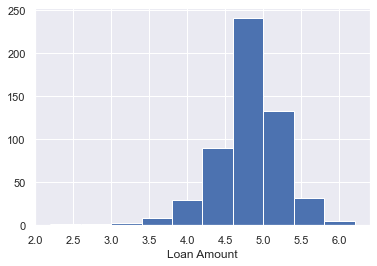

In [63]:
# logrithmic transformation

import numpy as np
x = np.log(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

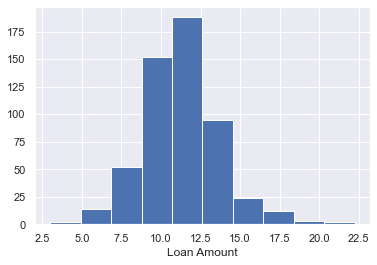

In [62]:
# Square root transformation

x= np.sqrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

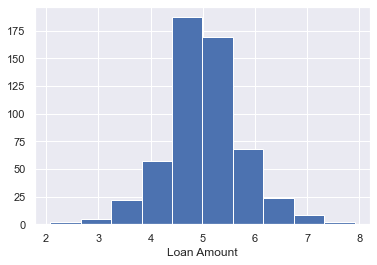

In [65]:
# Cube root transformation

x = np.cbrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

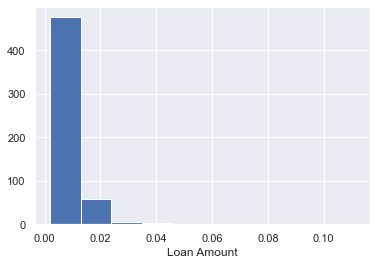

In [66]:
# Reciprocal transformation

x= np.reciprocal(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

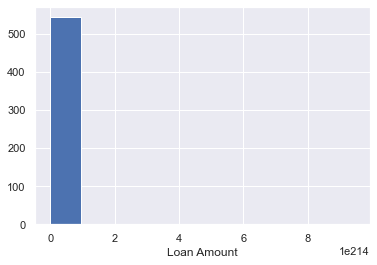

In [68]:
# Exponential transformation

x= np.exp(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [78]:
# Write your solution here

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ndf1 = scaler.fit_transform(ndf)
ndf1 = pd.DataFrame(ndf1, columns = ndf.columns)
ndf1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,NaN,0.743590,1.0
1,0.054830,0.036192,0.172214,0.743590,1.0
2,0.035250,0.000000,0.082489,0.743590,1.0
3,0.030093,0.056592,0.160637,0.743590,1.0
4,0.072356,0.000000,0.191027,0.743590,1.0
...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0
610,0.048930,0.000000,0.044863,0.358974,1.0
611,0.097984,0.005760,0.353111,0.743590,1.0
612,0.091936,0.000000,0.257598,0.743590,1.0


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf2 = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(ndf2, columns = ndf.columns)
ndf2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,NaN,0.276642,0.432861
1,-0.134412,-0.038732,-0.215309,0.276642,0.432861
2,-0.393747,-0.554487,-0.940328,0.276642,0.432861
3,-0.462062,0.251980,-0.308860,0.276642,0.432861
4,0.097728,-0.554487,-0.063289,0.276642,0.432861
...,...,...,...,...,...
609,-0.410130,-0.554487,-0.881859,0.276642,0.432861
610,-0.212557,-0.554487,-1.244368,-2.489775,0.432861
611,0.437174,-0.472404,1.246423,0.276642,0.432861
612,0.357064,-0.554487,0.474628,0.276642,0.432861


In [79]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
ndf2 = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(ndf2, columns = ndf.columns)
ndf2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.698029,-0.517358,NaN,0.000000,0.0
1,0.264096,0.139079,0.000000,0.000000,0.0
2,-0.278492,-0.517358,-0.911765,0.000000,0.0
3,-0.421422,0.509087,-0.117647,0.000000,0.0
4,0.749786,-0.517358,0.191176,0.000000,0.0
...,...,...,...,...,...
609,-0.312768,-0.517358,-0.838235,0.000000,0.0
610,0.100600,-0.517358,-1.294118,-0.384615,0.0
611,1.459983,-0.412885,1.838235,0.000000,0.0
612,1.292374,-0.517358,0.867647,0.000000,0.0


## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [116]:
# Write your solution here

df = pd.read_csv("loan_train.csv")
from sklearn.impute import SimpleImputer
categorical_cols =  df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
cdf = impute.fit_transform(categorical_cols)
cdf = pd.DataFrame(data=cdf, columns = categorical_cols.columns)
cdf.drop(columns = 'Loan_ID', inplace=True)
cdf


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [117]:
categorical_columns = ['Gender','Married','Self_Employed']
cdf1= cdf[categorical_columns]
cdf1 = pd.get_dummies(cdf1)
cdf1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,0,1,1,0,1,0
1,0,1,0,1,1,0
2,0,1,0,1,0,1
3,0,1,0,1,1,0
4,0,1,1,0,1,0
...,...,...,...,...,...,...
609,1,0,1,0,1,0
610,0,1,0,1,1,0
611,0,1,0,1,1,0
612,0,1,0,1,1,0


In [126]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cdf[['Property_Area','Education']] = oe.fit_transform(cdf[['Property_Area','Education']])
cdf2 = pd.DataFrame(cdf)
cdf2

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,0.0,No,2.0,Y
1,Male,Yes,1,0.0,No,0.0,N
2,Male,Yes,0,0.0,Yes,2.0,Y
3,Male,Yes,0,1.0,No,2.0,Y
4,Male,No,0,0.0,No,2.0,Y
...,...,...,...,...,...,...,...
609,Female,No,0,0.0,No,0.0,Y
610,Male,Yes,3+,0.0,No,0.0,Y
611,Male,Yes,1,0.0,No,2.0,Y
612,Male,Yes,2,0.0,No,2.0,Y


In [127]:
cdf = pd.concat([cdf1,cdf2], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Dependents,Education,Property_Area,Loan_Status
0,0,1,1,0,1,0,0,0.0,2.0,Y
1,0,1,0,1,1,0,1,0.0,0.0,N
2,0,1,0,1,0,1,0,0.0,2.0,Y
3,0,1,0,1,1,0,0,1.0,2.0,Y
4,0,1,1,0,1,0,0,0.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0.0,0.0,Y
610,0,1,0,1,1,0,3+,0.0,0.0,Y
611,0,1,0,1,1,0,1,0.0,2.0,Y
612,0,1,0,1,1,0,2,0.0,2.0,Y


## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [131]:
#Write your solution here

alldf = pd.concat([cdf, ndf], axis=1)
alldf.isna().sum()
alldf.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Dependents,Education,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,0,0.0,2.0,Y,5849,0.0,NaN,360.0,1.0
1,0,1,0,1,1,0,1,0.0,0.0,N,4583,1508.0,128.0,360.0,1.0
2,0,1,0,1,0,1,0,0.0,2.0,Y,3000,0.0,66.0,360.0,1.0
3,0,1,0,1,1,0,0,1.0,2.0,Y,2583,2358.0,120.0,360.0,1.0
4,0,1,1,0,1,0,0,0.0,2.0,Y,6000,0.0,141.0,360.0,1.0


# <center>THANK YOU